In [1]:
!pip install pandas
import os

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 1.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 2.1 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 560.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 961.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:0000:0100:010m


In [3]:
os.getcwd()

'/home/bhoomi/Desktop/lu'

In [5]:
import pandas as pd
data=pd.read_csv("household_power_consumption.csv",header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])

/tmp/ipykernel_80933/3789166741.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data=pd.read_csv("household_power_consumption.csv",header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])


In [99]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [19]:
daily_data=data.resample('D').sum()

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

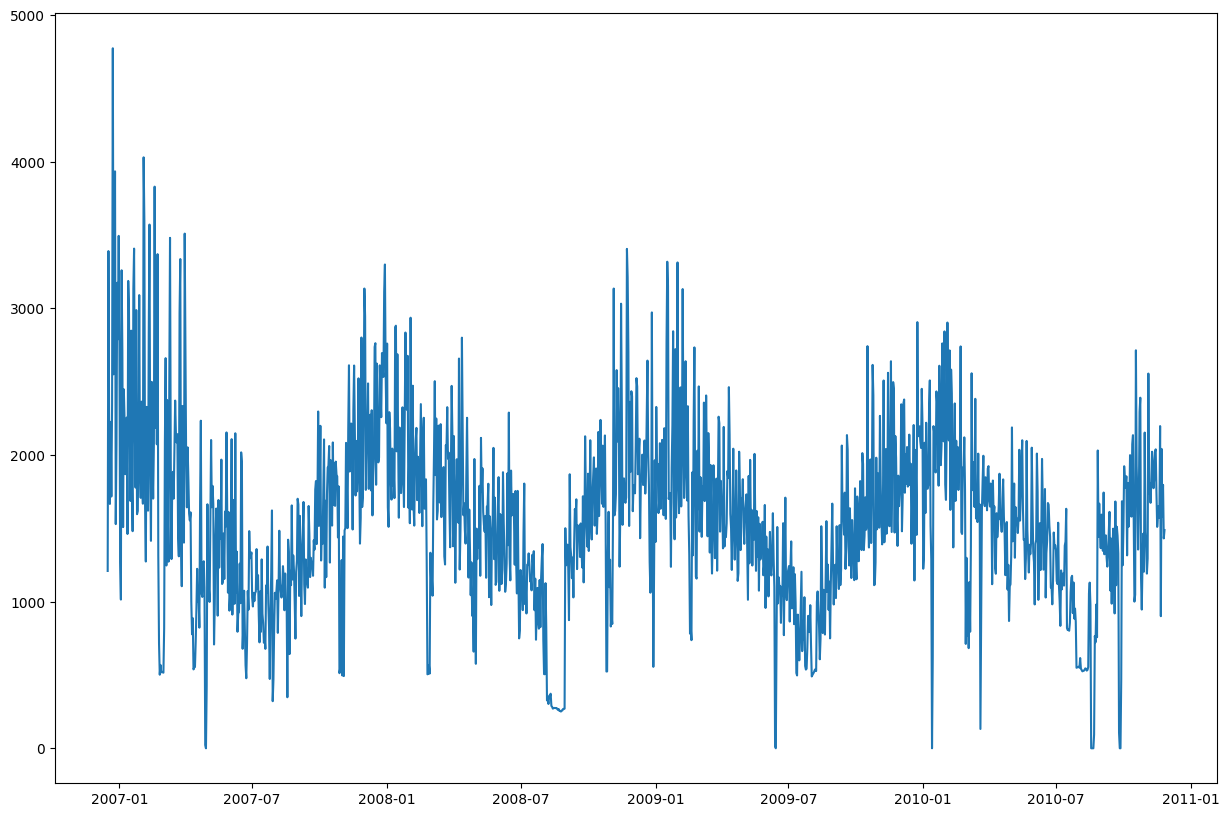

In [21]:
plt.figure(figsize=(15,10))
plt.plot(daily_data['Global_active_power'])

In [22]:
#You may save the CSV file according to the days
daily_data.to_csv("household_daily.csv")

In [23]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [24]:

from sklearn.metrics import mean_squared_error

In [25]:
def forecasts(act,pred):
    scores=[]
    for i in range(act.shape[1]):
        mse=mean_squared_error(act[:,i],pred[:,i])
        rmse=np.sqrt(mse)
        scores.append(rmse)
    s=0
    for row in range(act.shape[0]):
        for col in range(act.shape[1]):
            s+=(act[row,col]-pred[row,col])**2
    score=np.sqrt(s/(act.shape[0]*act.shape[1]))
    return score,scores

In [26]:
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


In [6]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import numpy as np

In [8]:
def split(data):
    train,test=data[1:-328],data[-328:-6]
    train=np.array(np.split(train,len(train)/7))
    test=np.array(np.split(test,len(test)/7))
    return train,test

In [9]:
def summarized_scores(name,score,scores):
    s_scores=', '.join(['%.1f'%s for s in scores])
    print('%s:[%.3f] %s'%(name,score,s_scores))

In [10]:
def to_supervized(train,n_in,n_out):
    data=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    X,y=[],[]
    in_start=0
    for i in range(len(data)):
        in_end=in_start+n_in
        out_end=in_end+n_out
        if out_end<len(data):
            x_in=data[in_start:in_end,0]
            x_in=x_in.reshape((len(x_in),1))
            X.append(x_in)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return np.array(X),np.array(y)

In [11]:
#!pip uninstall keras tensorflow
!pip install keras tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

2024-10-05 20:52:15.151404: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 20:52:15.406067: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 20:52:15.581086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 20:52:15.791405: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 20:52:15.882371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 20:52:16.229401: I tensorflow/core/platform/cpu_feature_gu

In [13]:
def build_model(train,n_input):
    train_x,train_y=to_supervized(train,n_input,7)
    verbose=0
    epochs=70
    batch_size=16
    n_timesteps=train_x.shape[1]
    n_features=train_x.shape[2]
    n_outputs=train_y.shape[1]
    model=Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(n_timesteps,n_features)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse',optimizer='adam')
    model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,verbose=verbose)
    return model

In [14]:
def forecast(model,history,n_input):
    data=np.array(history)
    data=data.reshape((data.shape[0]*data.shape[1],data.shape[2]))
    in_x=data[-n_input:,0]
    in_x=in_x.reshape((1,len(in_x),1))
    yhat=model.predict(in_x,verbose=0)
    return yhat[0]

In [15]:
def evaluate_model(train,test,n_input):
    model=build_model(train,n_input)
    history=[x for x in train]
    prediction=[]
    for i in range(len(test)):
        yhat_s=forecast(model,history,n_input)
        prediction.append(yhat_s)
        history.append(test[i,:])
    prediction=np.array(prediction)
    score,scores=forecasts(test[:,:,0],prediction)
    return score,scores

In [16]:
import numpy as np

In [27]:
train, test=split(daily_data.values)

In [28]:
import numpy as np

In [29]:
 train.shape

(159, 7, 7)

In [30]:
  # Convert the list 'test' to a NumPy array.
test.shape # Now you can access the shape attribute.

(46, 7, 7)

In [31]:
score,scores=evaluate_model(train,test,14)

/home/bhoomi/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Assuming 'score' should hold a single numeric value representing the model's score


summarized_scores('lstm', score, scores)

lstm:[453.247] 458.1, 437.1, 378.1, 519.2, 435.4, 374.1, 543.2


In [33]:
days=['sun','mon','tue','wed','thr','fri','sat']

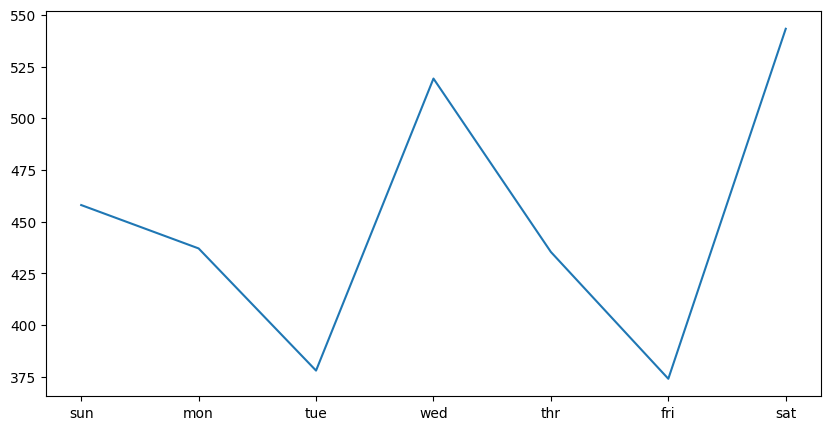

In [34]:
plt.figure(figsize=(10,5))
plt.plot(days,scores)

In [35]:
import numpy as np
import pandas as pd

# Sample time series data (use your actual dataset here)
# This should be time series data, for example, daily energy consumption
data = pd.read_csv('household_daily.csv', header=0, index_col=0)

In [36]:
def split(data):
    # Using 70% of data for training, and the rest for testing
    train_size = int(len(data) * 0.7)
    train, test = data[:train_size], data[train_size:]

    # Reshape into weekly blocks for the LSTM
    train = np.array(np.split(train, len(train) // 7))
    test = np.array(np.split(test, len(test) // 7))

    return train, test
    # Split the data
    train, test = split(daily_data.values)


In [37]:
# Define how many input time steps the model will use to predict future values (e.g., 14 days)
n_input = 14

# Build and train the model
model = build_model(train, n_input)

# Save the trained model to a file
model.save('lstm_model.h5')

/home/bhoomi/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
import pickle

# Save the model to disk
def save_model(model, filename='lstm_model.pkl'):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Call this function after training
save_model(model)


In [39]:
!pip install Flask

Defaulting to user installation because normal site-packages is not writeable


In [137]:
!pip install flask-ngrok

In [140]:
!pip install pyngrok


In [142]:
from pyngrok import ngrok

# Paste your authtoken here
authtoken = "2n1V7FpSgeJRp70WttQKo0fpJGb_TtZDqBeQJCFHXrBxNySX"

# Set the authtoken for ngrok
ngrok.set_auth_token(authtoken)


In [ ]:
from flask import Flask
from pyngrok import ngrok

app = Flask(__name__)

@app.route('/')
def home():
    return "<h1>Hello, Flask App!</h1>"

# Expose the Flask app to the public using ngrok
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")

app.run()


Public URL: NgrokTunnel: "https://ffa5-35-224-211-242.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [141]:
!pip install flask pyngrok
from flask import Flask, request, render_template
from pyngrok import ngrok
import numpy as np
import pickle

app = Flask(__name__)

# Load the saved model
with open('lstm_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Helper function to reshape input data for prediction
def prepare_input_data(input_data):
    # Reshape the input into the format LSTM expects: (n_input, 1)
    input_data = np.array(input_data).reshape((1, len(input_data), 1))
    return input_data

# Route for the homepage with the form
@app.route('/')
def index():
    return '''
    <form action="/predict" method="POST">
        <input type="text" name="input_values" placeholder="Enter values (comma-separated)">
        <input type="submit" value="Predict">
    </form>
    '''

# Route for handling the prediction request
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from form
    input_values = [float(x) for x in request.form['input_values'].split(',')]

    # Prepare input for the model
    input_data = prepare_input_data(input_values)

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display the prediction in HTML
    return f'Predicted Energy Consumption: {prediction:.2f} kW'

if __name__ == "__main__":
    # Open a ngrok tunnel to the Flask app
    public_url = ngrok.connect(5000)
    print(f' * ngrok tunnel: {public_url}')

    # Run the Flask app
    app.run()


ERROR:pyngrok.process.ngrok:t=2024-10-05T14:52:23+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-10-05T14:52:23+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-10-05T14:52:23+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [138]:
from flask import Flask, request, render_template
import numpy as np
import pickle

app = Flask(__name__)

# Load the saved model
with open('lstm_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Helper function to reshape input data for prediction
def prepare_input_data(input_data):
    # Reshape the input into the format LSTM expects: (n_input, 1)
    input_data = np.array(input_data).reshape((1, len(input_data), 1))
    return input_data

# Route for the homepage with the form
@app.route('/')
def index():
    return render_template('index.html')

# Route for handling the prediction request
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from form
    input_values = [float(x) for x in request.form.values()]

    # Prepare input for the model
    input_data = prepare_input_data(input_values)

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display the prediction in HTML
    return render_template('index.html', prediction_text=f'Predicted Energy Consumption: {prediction:.2f} kW')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
